In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

from matplotlib import cm
import seaborn as sns
%matplotlib inline
CUTOFF_YEAR = 1985

In [2]:
# Read in Data
compact_data = pd.read_csv('data/NCAATourneyCompactResults2.csv')
detailed_data = pd.read_csv('data/NCAATourneyDetailedResults.csv')

# Cut to 2000 and Beyond
compact_data = compact_data[compact_data['Season']>=CUTOFF_YEAR].reset_index(drop=True)
detailed_data = detailed_data[detailed_data['Season']>=CUTOFF_YEAR].reset_index(drop=True)

In [3]:
compact_data.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0.0
1,1985,136,1120,59,1345,58,N,0.0
2,1985,136,1207,68,1250,43,N,0.0
3,1985,136,1229,58,1425,55,N,0.0
4,1985,136,1242,49,1325,38,N,0.0


In [4]:
detailed_data.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


### Get Seed Data from Other Files

In [5]:
# Read in Seed Data
seed_data = pd.read_csv('data/NCAATourneySeeds.csv')

# Trim to CUTOFF_YEAR
seed_data = seed_data[seed_data['Season']>=CUTOFF_YEAR].reset_index(drop=True)

seed_data.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [6]:
# Make Lists
wseeds = [0] * compact_data.shape[0]
lseeds = [0] * compact_data.shape[0]
wregions = [''] * compact_data.shape[0]
lregions = [''] * compact_data.shape[0]

# For Each Row (Game) in compact_data
for i in range(compact_data.shape[0]):
    
    # Get Row Data
    row = compact_data.loc[i]
    year = row.Season
    wid = row.WTeamID
    lid = row.LTeamID
    if lid == 1377: lid=1355
    # Find WID in seed_data
    # Trim Datasets to Correct Year
    temp_compact = compact_data[compact_data['Season']==year]
    temp_seed = seed_data[seed_data['Season']==year]
    
    # Get Correct Rows in temp_seed
    win_seed_row = temp_seed[temp_seed['TeamID']==wid].iloc[0]
    lose_seed_row = temp_seed[temp_seed['TeamID']==lid].iloc[0]
    
    # Get Seed (Includes Region)
    win_seed = win_seed_row.Seed
    lose_seed = lose_seed_row.Seed
    
    # Add Seeds and Regions to List
    wregions[i] = win_seed[0]
    lregions[i] = lose_seed[0]
    wseeds[i] = int(win_seed[1:3])
    lseeds[i] = int(lose_seed[1:3])

In [7]:
# Add New Columns to DataFrame
compact_data['WSeed'] = wseeds
compact_data['LSeed'] = lseeds
compact_data['WRegion'] = wregions
compact_data['LRegion'] = lregions

In [8]:
compact_data[compact_data['Season']==2018]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,LSeed,WRegion,LRegion
2117,2018,136,1420,74,1438,54,S,NaN,16,1,Y,Y
2118,2018,136,1153,68,1209,53,NaN,NaN,2,15,Y,Y
2119,2018,136,1397,73,1460,47,NaN,NaN,3,14,Y,Y
2120,2018,136,1138,89,1112,68,NaN,NaN,13,4,Y,Y
2121,2018,136,1246,78,1172,73,NaN,NaN,5,12,Y,Y
2122,2018,136,1260,64,1274,62,NaN,NaN,11,6,Y,Y
2123,2018,136,1305,87,1400,83,NaN,1.0,7,10,Y,Y
2124,2018,136,1243,69,1166,59,NaN,NaN,9,8,Y,Y
2125,2018,136,1462,102,1411,83,NaN,NaN,1,16,W,W
2126,2018,136,1314,84,1252,66,NaN,NaN,2,15,W,W


In [9]:
compact_data.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,LSeed,WRegion,LRegion
0,1985,136,1116,63,1234,54,N,0.0,9,8,X,X
1,1985,136,1120,59,1345,58,N,0.0,11,6,Z,Z
2,1985,136,1207,68,1250,43,N,0.0,1,16,W,W
3,1985,136,1229,58,1425,55,N,0.0,9,8,Y,Y
4,1985,136,1242,49,1325,38,N,0.0,3,14,Z,Z


## Add New Columns and Separate DataFrame by Round (Teams Overlap)

In [10]:
# Add New Column For Total Score
compact_data['TScore'] = compact_data['WScore'] + compact_data['LScore']

# Add Column For Total Turnovers
compact_data['TTO'] = detailed_data['WTO'] + detailed_data['LTO']

# Add Column for Total Field Goals Attempted
compact_data['TFGA'] = detailed_data['WFGA'] + detailed_data['LFGA']

# Add Column for Total 3-Pointers Attempted
compact_data['TFGA3'] = detailed_data['WFGA3'] + detailed_data['LFGA3']

# Add Column for Total 3-Pointers Attempted
compact_data['TPF'] = detailed_data['WPF'] + detailed_data['LPF']

round1 = compact_data[np.logical_or(compact_data['DayNum']==136, compact_data['DayNum']==137)]
round2 = compact_data[np.logical_or(compact_data['DayNum']==138, compact_data['DayNum']==139)]
round3 = compact_data[np.logical_or(compact_data['DayNum']==143, compact_data['DayNum']==144)]
round4 = compact_data[np.logical_or(compact_data['DayNum']==145, compact_data['DayNum']==146)]
round5 = compact_data[compact_data['DayNum']==152]
round6 = compact_data[compact_data['DayNum']==154]

round_data_list = [round1, round2, round3, round4, round5, round6]

## Count Occurences of Each Seed in Each Round

In [11]:
# Dictionary of Lists of Seed Counts (Inde of List is the Seed-1)
seed_counts = {'round1': [0]*16, 'round2': [0]*16, 'round3': [0]*16, 'round4': [0]*16, 'round5': [0]*16, 'round6': [0]*16, 'round7': [0]*16}

for round_num, round_data in enumerate(round_data_list):
    round_num += 1
    seed_list = list(round_data['WSeed'])+list(round_data['LSeed'])
    for seed in seed_list:
        seed_counts['round{}'.format(round_num)][seed-1] += 1
        
# Get Winners
for winner_seed in round_data_list[5]['WSeed']:
    seed_counts['round7'][winner_seed-1] += 1
        
seed_counts

{'round1': [136,
  136,
  136,
  136,
  136,
  136,
  136,
  136,
  136,
  136,
  136,
  136,
  136,
  136,
  136,
  136],
 'round2': [135, 128, 115, 108, 89, 85, 84, 68, 68, 52, 51, 47, 28, 21, 8, 1],
 'round3': [116, 85, 70, 64, 46, 42, 27, 13, 7, 23, 22, 20, 6, 2, 1, 0],
 'round4': [94, 62, 34, 21, 8, 14, 10, 8, 4, 8, 8, 1, 0, 0, 0, 0],
 'round5': [56, 28, 16, 13, 6, 3, 3, 5, 1, 1, 4, 0, 0, 0, 0, 0],
 'round6': [33, 13, 10, 3, 3, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0],
 'round7': [21, 5, 4, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]}

In [12]:
# Convert Counts to Percentages
seed_percs = dict()
for k in seed_counts.keys():
    seed_percs[k] = np.divide(seed_counts[k], np.sum(seed_counts[k]))

In [13]:
# Convert to Keys Being Seeds, Values Being Lists of Shares at Each Round
new_dict = dict()
for seed in range(1,17):
    new_dict[str(seed)] = [seed_percs['round{}'.format(round_num)][seed-1] for round_num in range(1,8)]

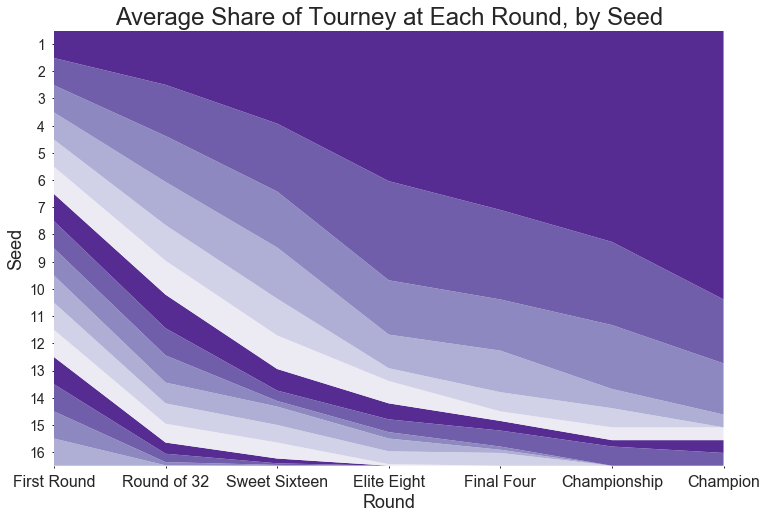

In [14]:
# Plot!
fig, ax = plt.subplots(1,1,figsize=(12,8))

# Decent Color Pallets: 'Paired', 'RdBu', 'Purples'

# use a known color palette (see..)
pal = sns.color_palette("Purples")

ax.stackplot(range(1, 8), [0]*7, [0]*7, new_dict['16'], new_dict['15'], new_dict['14'], new_dict['13'],
             new_dict['12'], new_dict['11'], new_dict['10'], new_dict['9'],
             new_dict['8'], new_dict['7'], new_dict['6'], new_dict['5'],
             new_dict['4'], new_dict['3'], new_dict['2'], new_dict['1'],
             colors = pal)#,
             #labels=[str(i) for i in range(1,17)])

ax.set_facecolor('white')

ax.set_xlim([1,7])
ax.set_ylim([0,1])
ax.set_xlabel('Round', fontsize=18)
ax.set_ylabel('Seed', fontsize=18)
ax.set_title('Average Share of Tourney at Each Round, by Seed', fontsize=24)
ax.set_yticks(np.linspace(.03125, .0303*32, 16))
ax.set_yticklabels(np.arange(16,0, -1), fontsize=14)
ax.set_xticklabels(['First Round', 'Round of 32', 'Sweet Sixteen', 'Elite Eight', 'Final Four', 'Championship', 'Champion'], fontsize=16)
ax.tick_params(axis=u'both', which=u'both',length=2)
#ax.yaxis.set_ticks_position('both')

#ax2 = ax.twinx()
#ax2.set_ylabel('Share of Tourney Slots', fontsize=18)
#ax2.tick_params()

# now, the second axes that shares the x-axis with the ax1
#ax2 = fig.add_subplot(111, sharex=ax, frameon=False)
#line2 = ax2.plot([10,40,20,30,50], 'xr-')
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax2.set_ylabel("Right Y-Axis Data")
#ax2.set_xlabel('', fontsize=0)

#ax2.grid(False)
#ax.legend()
plt.show()

# Make this a line plot

In [15]:
#print(plt.style.available)
seed_counts

{'round1': [136,
  136,
  136,
  136,
  136,
  136,
  136,
  136,
  136,
  136,
  136,
  136,
  136,
  136,
  136,
  136],
 'round2': [135, 128, 115, 108, 89, 85, 84, 68, 68, 52, 51, 47, 28, 21, 8, 1],
 'round3': [116, 85, 70, 64, 46, 42, 27, 13, 7, 23, 22, 20, 6, 2, 1, 0],
 'round4': [94, 62, 34, 21, 8, 14, 10, 8, 4, 8, 8, 1, 0, 0, 0, 0],
 'round5': [56, 28, 16, 13, 6, 3, 3, 5, 1, 1, 4, 0, 0, 0, 0, 0],
 'round6': [33, 13, 10, 3, 3, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0],
 'round7': [21, 5, 4, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]}

In [16]:
tpose = transpose(seed_counts, 7, [str(i) for i in range(1,17)])
for i in range(1,17):
    tpose[str(i)] = np.divide(tpose[str(i)], tpose[str(i)][0])

#plt.style.use('seaborn-colorblind')
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)

#plt.style.use('seaborn-notebook')

    
fig, ax = plt.subplots(1,1,figsize=(12,8))

ax.plot(tpose['1'], color='lightblue')
ax.plot(tpose['2'], color='lightblue')
ax.plot(tpose['3'], color='lightblue')
ax.plot(tpose['4'], color='lightblue')
ax.plot(tpose['5'], color='blue')
ax.plot(tpose['6'], color='lightblue')
ax.plot(tpose['7'], color='lightblue')
ax.plot(tpose['8'], color='lightblue')
ax.plot(tpose['9'], color='lightblue')
ax.plot(tpose['10'], color='lightblue')
ax.plot(tpose['11'], color='lightblue')
ax.plot(tpose['12'], color='lightblue')
ax.plot(tpose['13'], color='lightblue')
ax.plot(tpose['14'], color='lightblue')
ax.plot(tpose['15'], color='lightblue')
ax.plot(tpose['16'], color='lightblue')

ax.set_facecolor('white')
ax.set_xlabel('Round', fontsize=18)
ax.set_ylabel('Percent Left', fontsize=18)
ax.set_title('Percent of Seeds at Each Round', fontsize=24)
ax.set_xticklabels(['', 'Round of 64', 'Round of 32', 'Sweet 16', 'Elite 8', 'Final 4', 'Championship', 'Champion'], fontsize=16)
ax.tick_params(axis=u'both', which=u'both',length=2)
ax.set_ylim([-0.02,1.02])
#ax.set_xlim([0,7])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.yaxis.grid(linestyle='dotted')

plt.show()

NameError: name 'transpose' is not defined

## Try bar charts?

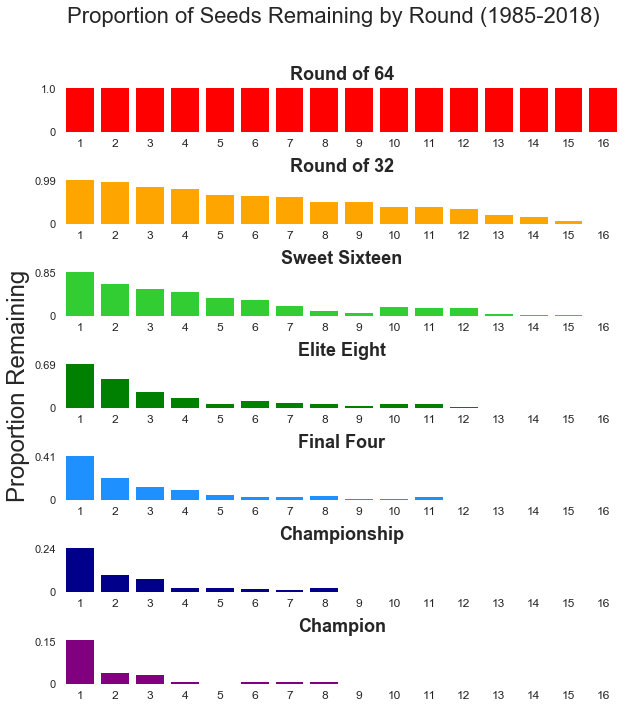

In [32]:
round_names = ['Round of 64', 'Round of 32', 'Sweet Sixteen', 'Elite Eight', 'Final Four', 'Championship', 'Champion']
seed_left = dict()
for i in range(1,8):
    seed_left['round{}'.format(i)] = np.divide(seed_counts['round{}'.format(i)], seed_counts['round1'][0])

fig, axes = plt.subplots(7,1,figsize=(10,11))
#fig.tight_layout()
plt.subplots_adjust(hspace = 1)

bar_colors = ['red', 'orange', 'limegreen', 'green', 'dodgerblue', 'darkblue', 'purple']

for i in range(1,8):
    axes[i-1].bar(range(1,17), seed_left['round{}'.format(i)], color=bar_colors[i-1])
    axes[i-1].spines['top'].set_visible(False)
    axes[i-1].spines['right'].set_visible(False)
    #axes[i-1].spines['bottom'].set_visible(False)
    #axes[i-1].spines['left'].set_visible(False)
    axes[i-1].set_xticks(range(1,17))
    axes[i-1].set_xticklabels(range(1,17), fontsize=12)
    axes[i-1].set_title(round_names[i-1], fontsize=18, fontweight='bold')
    axes[i-1].set_xlim([.5,16.5])
    axes[i-1].set_yticks([0,np.round(seed_left['round{}'.format(i)][0], 2)])
    axes[i-1].set_yticklabels([0,np.round(seed_left['round{}'.format(i)][0], 2)], fontsize=11)
    axes[i-1].set_facecolor('w')
    axes[i-1].grid(False)

fig.patch.set_facecolor('w')

axes[3].set_ylabel('Proportion Remaining', fontsize=24)
fig.suptitle('Proportion of Seeds Remaining by Round (1985-2018)', fontsize=22)

#plt.savefig('Seed_Barplot.pdf')
plt.show()

In [100]:
# Interpretation Shit

print('Probability that an average 10 seed makes it to the sweet 16:', np.round(seed_left['round3'][10-1], 4))
print('Probability that an average 8 seed makes it to the sweet 16:', np.round(seed_left['round3'][8-1], 4))
print('Probability that an average 9 seed makes it to the sweet 16:', np.round(seed_left['round3'][9-1], 4))
print('Probability that an average 15 seed makes it past the first round:', np.round(seed_left['round2'][15-1], 4))

Probability that an average 10 seed makes it to the sweet 16: 0.1691
Probability that an average 8 seed makes it to the sweet 16: 0.0956
Probability that an average 9 seed makes it to the sweet 16: 0.0515
Probability that an average 15 seed makes it past the first round: 0.0588


In [129]:
# How do 10 seeds do in 10-15 matchups
w10l15 = compact_data[np.logical_and(compact_data['WSeed']==10,
                                    compact_data['LSeed']==15)].shape[0]
w15l10 = compact_data[np.logical_and(compact_data['WSeed']==15,
                                    compact_data['LSeed']==10)].shape[0]

# How do 10 seeds do in 10-2 matchups
w10l2 = compact_data[np.logical_and(compact_data['WSeed']==10,
                                    compact_data['LSeed']==2)].shape[0]
w2l10 = compact_data[np.logical_and(compact_data['WSeed']==2,
                                    compact_data['LSeed']==10)].shape[0]

print('The average 10 seed wins {}% of their games against 2 seeds.'.format(np.round(w10l2/(w10l2+w2l10), 4)*100))
print('The average 10 seed wins {}% of their games against 15 seeds.'.format(np.round(w10l15/(w10l15+w15l10), 4)*100))

print('10 seeds have played {} games against 2 seeds'.format(w10l2+w2l10))
print('10 seeds have played {} games against 15 seeds'.format(w10l15+w15l10))

print()

# How do 10 seeds do in 10-15 matchups
w7l15 = compact_data[np.logical_and(compact_data['WSeed']==7,
                                    compact_data['LSeed']==15)].shape[0]
w15l7 = compact_data[np.logical_and(compact_data['WSeed']==15,
                                    compact_data['LSeed']==7)].shape[0]

# How do 10 seeds do in 10-2 matchups
w7l2 = compact_data[np.logical_and(compact_data['WSeed']==7,
                                    compact_data['LSeed']==2)].shape[0]
w2l7 = compact_data[np.logical_and(compact_data['WSeed']==2,
                                    compact_data['LSeed']==7)].shape[0]

print('The average 7 seed wins {}% of their games against 2 seeds.'.format(np.round(w7l2/(w7l2+w2l7), 4)*100))
print('The average 7 seed wins {}% of their games against 15 seeds.'.format(np.round(w7l15/(w10l15+w15l7), 4)*100))

print('7 seeds have played {} games against 2 seeds'.format(w7l2+w2l7))
print('7 seeds have played {} games against 15 seeds'.format(w7l15+w15l7))

print()

w8l1 = compact_data[np.logical_and(compact_data['WSeed']==8,
                                    compact_data['LSeed']==1)].shape[0]
w1l8 = compact_data[np.logical_and(compact_data['WSeed']==1,
                                    compact_data['LSeed']==8)].shape[0]

# How do 10 seeds do in 10-2 matchups
w9l1 = compact_data[np.logical_and(compact_data['WSeed']==9,
                                    compact_data['LSeed']==1)].shape[0]
w1l9 = compact_data[np.logical_and(compact_data['WSeed']==1,
                                    compact_data['LSeed']==9)].shape[0]

print('The average 8 seed wins {}% of their games against 1 seeds.'.format(np.round(w8l1/(w8l1+w1l8), 4)*100))
print('The average 9 seed wins {}% of their games against 1 seeds.'.format(np.round(w9l1/(w1l9+w9l1), 4)*100))

print('8 seeds have played {} games against 1 seeds'.format(w8l1+w1l8))
print('9 seeds have played {} games against 1 seeds'.format(w1l9+w9l1))
(w8l1+w9l1)/(w1l8+w1l9+w8l1+w9l1)

The average 10 seed wins 38.3% of their games against 2 seeds.
The average 10 seed wins 100.0% of their games against 15 seeds.
10 seeds have played 47 games against 2 seeds
10 seeds have played 5 games against 15 seeds

The average 7 seed wins 30.86% of their games against 2 seeds.
The average 7 seed wins 33.33% of their games against 15 seeds.
7 seeds have played 81 games against 2 seeds
7 seeds have played 3 games against 15 seeds

The average 8 seed wins 20.0% of their games against 1 seeds.
The average 9 seed wins 8.82% of their games against 1 seeds.
8 seeds have played 70 games against 1 seeds
9 seeds have played 68 games against 1 seeds


0.14492753623188406

In [124]:
compact_data[np.logical_and(compact_data['WSeed']==1,
                                    compact_data['LSeed']==2)].shape[0]

35

In [31]:
seed_counts['round4']

[94, 62, 34, 21, 8, 14, 10, 8, 4, 8, 8, 1, 0, 0, 0, 0]

## Are 10 seeds who win the 10-7 matchup significantly better than ones who lose?

In [159]:
compact_data[np.logical_and(compact_data['WSeed']==10, compact_data['LSeed']==7)].to_csv('ten_over_seven.csv')
compact_data[np.logical_and(compact_data['WSeed']==7, compact_data['LSeed']==10)].to_csv('seven_over_ten.csv')

In [29]:
dubs = compact_data[np.logical_and(compact_data['WSeed']==10, compact_data['LSeed']==2)].shape[0]
ells = compact_data[np.logical_and(compact_data['WSeed']==2, compact_data['LSeed']==10)].shape[0]

print('Percentage of Games that 7 Seeds Win on 2 Seeds: ', dubs/(dubs+ells))
print('7 Seeds and 2 Seeds Have Played {} Games Against Each Other.'.format(dubs+ells))
print('Record of 7 seeds is {}-{}'.format(dubs,ells))

Percentage of Games that 7 Seeds Win on 2 Seeds:  0.3829787234042553
7 Seeds and 2 Seeds Have Played 47 Games Against Each Other.
Record of 7 seeds is 18-29


## Do One for Total Points Scored per Game

In [470]:


def to_percs(count_dict):
    perc_dict = dict()
    for k in count_dict.keys():
        perc_dict[k] = np.divide(count_dict[k], np.sum(count_dict[k]))
    return perc_dict

def transpose(dic, num_rounds, group_names):
    # Convert to Keys Being Seeds, Values Being Lists of Shares at Each Round
    new_dict = dict()
    for i, group_name in enumerate(group_names):
        new_dict[group_name] = [dic['round{}'.format(round_num)][i] for round_num in range(1,num_rounds+1)]
    return new_dict

In [488]:
num_groups = 5
quantiles = np.linspace(1/num_groups,1-(1/num_groups),num_groups-1)
brackets = np.quantile(round_data_list[0]['TScore'], quantiles)

# Dictionary of Lists of Seed Counts (Inde of List is the Seed-1)
score_counts = {'round1': [0]*num_groups, 'round2': [0]*num_groups, 'round3': [0]*num_groups, 'round4': [0]*num_groups, 'round5': [0]*num_groups}#, 'round6': [0]*num_groups}

for round_num, round_data in enumerate(round_data_list[:len(round_data_list)-1]):
    round_num += 1
    score_list = list(round_data['TScore'])
    for score in score_list:
        
        # Figure Out Which Bucket Score Falls Into
        for i, b in enumerate(brackets):
            if score <= b:
                score_counts['round{}'.format(round_num)][i] += 1
                break
            elif score > brackets[-1]:
                score_counts['round{}'.format(round_num)][len(brackets)] += 1
                break
                
# Make Group Names
group_names = ['<{}'.format(brackets[0])] + ['{}-{}'.format(brackets[i], brackets[i+1]) for i in range(len(brackets)-1)] + ['>{}'.format(brackets[-1])]

# Convert to Percentages, Correct Formatting
plot_dict = transpose(to_percs(score_counts), num_rounds=5, group_names=group_names)

In [475]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


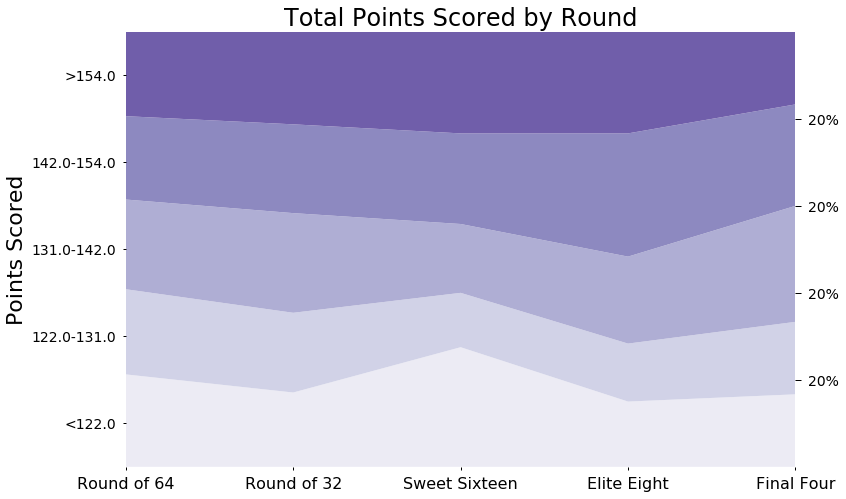

In [500]:
num_rounds=5
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)
#plt.style.use('seaborn-notebook')

# Plot!
fig, ax = plt.subplots(1,1,figsize=(12,8))

# Decent Color Pallets: 'Paired', 'RdBu', 'Purples'
pal = sns.color_palette("Purples")

ax.stackplot(range(1, num_rounds+1), plot_dict[group_names[0]], plot_dict[group_names[1]],
             plot_dict[group_names[2]], plot_dict[group_names[3]], plot_dict[group_names[4]],
             colors = pal)#,
             #labels=[str(i) for i in range(1,17)])

ax.set_facecolor('white')

ax.set_xlim([1,num_rounds])
ax.set_ylim([0,1])
#ax.set_xlabel('Round', fontsize=18)
ax.set_ylabel('Points Scored', fontsize=22)
ax.set_title('Total Points Scored by Round', fontsize=24)
ax.set_xticks(range(1, num_rounds+1))
ax.set_yticks(np.linspace(1/(2*num_groups), 1-(1/(2*num_groups)), num_groups))
ax.set_yticklabels(group_names, fontsize=14)
ax.set_xticklabels(round_names[:num_rounds], fontsize=16)
ax.tick_params(axis=u'both', which=u'both',length=3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_yticks([.2, .4, .6, .8])
ax2.set_yticklabels(['20%', '20%', '20%', '20%'])
ax2.tick_params(axis=u'both', which=u'both',length=6, labelsize=14)
ax2.grid(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

#ax.legend()
plt.show()

## Do Turnovers

In [502]:
num_groups = 5
quantiles = np.linspace(1/num_groups,1-(1/num_groups),num_groups-1)
brackets = np.quantile(round_data_list[0]['TTO'], quantiles)

# Dictionary of Lists of Seed Counts (Inde of List is the Seed-1)
score_counts = {'round1': [0]*num_groups, 'round2': [0]*num_groups, 'round3': [0]*num_groups, 'round4': [0]*num_groups, 'round5': [0]*num_groups, 'round6': [0]*num_groups}

for round_num, round_data in enumerate(round_data_list):
    round_num += 1
    score_list = list(round_data['TTO'])
    for score in score_list:
        
        # Figure Out Which Bucket Score Falls Into
        for i, b in enumerate(brackets):
            if score <= b:
                score_counts['round{}'.format(round_num)][i] += 1
                break
            elif score > brackets[-1]:
                score_counts['round{}'.format(round_num)][len(brackets)] += 1
                break
                
# Make Group Names
group_names = ['<{}'.format(brackets[0])] + ['{}-{}'.format(brackets[i], brackets[i+1]) for i in range(len(brackets)-1)] + ['>{}'.format(brackets[-1])]

# Convert to Percentages, Correct Formatting
plot_dict = transpose(to_percs(score_counts), num_rounds=6, group_names=group_names)

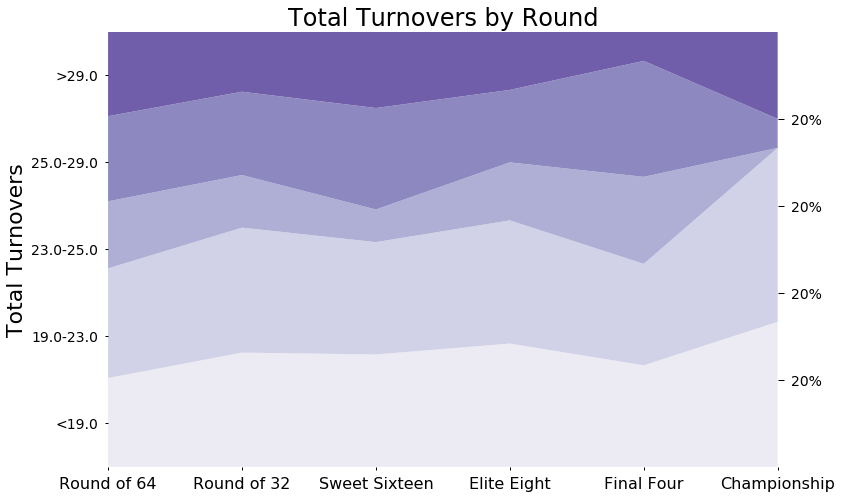

In [504]:
num_rounds=6

# Plot!
fig, ax = plt.subplots(1,1,figsize=(12,8))

# Decent Color Pallets: 'Paired', 'RdBu', 'Purples'
pal = sns.color_palette("Purples")

ax.stackplot(range(1, num_rounds+1), plot_dict[group_names[0]], plot_dict[group_names[1]],
             plot_dict[group_names[2]], plot_dict[group_names[3]], plot_dict[group_names[4]],
             colors = pal)#,
             #labels=[str(i) for i in range(1,17)])

ax.set_facecolor('white')

ax.set_xlim([1,num_rounds])
ax.set_ylim([0,1])
#ax.set_xlabel('Round', fontsize=18)
ax.set_ylabel('Total Turnovers', fontsize=22)
ax.set_title('Total Turnovers by Round', fontsize=24)
ax.set_yticks(np.linspace(1/(2*num_groups), 1-(1/(2*num_groups)), num_groups))
ax.set_yticklabels(group_names, fontsize=14)
ax.set_xticklabels(round_names[:num_rounds], fontsize=16)
ax.tick_params(axis=u'both', which=u'both',length=3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_yticks([.2, .4, .6, .8])
ax2.set_yticklabels(['20%', '20%', '20%', '20%'])
ax2.tick_params(axis=u'both', which=u'both',length=6, labelsize=14)
ax2.grid(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

#ax.legend()
plt.show()

## Do Total Field Goals Attempted

In [505]:
stat = 'TFGA'
num_groups = 5
quantiles = np.linspace(1/num_groups,1-(1/num_groups),num_groups-1)
brackets = np.quantile(round_data_list[0][stat], quantiles)

# Dictionary of Lists of Seed Counts (Inde of List is the Seed-1)
score_counts = {'round1': [0]*num_groups, 'round2': [0]*num_groups, 'round3': [0]*num_groups, 'round4': [0]*num_groups, 'round5': [0]*num_groups, 'round6': [0]*num_groups}

for round_num, round_data in enumerate(round_data_list):
    round_num += 1
    score_list = list(round_data[stat])
    for score in score_list:
        
        # Figure Out Which Bucket Score Falls Into
        for i, b in enumerate(brackets):
            if score <= b:
                score_counts['round{}'.format(round_num)][i] += 1
                break
            elif score > brackets[-1]:
                score_counts['round{}'.format(round_num)][len(brackets)] += 1
                break
                
# Make Group Names
group_names = ['<{}'.format(brackets[0])] + ['{}-{}'.format(brackets[i], brackets[i+1]) for i in range(len(brackets)-1)] + ['>{}'.format(brackets[-1])]

# Convert to Percentages, Correct Formatting
plot_dict = transpose(to_percs(score_counts), num_rounds=6, group_names=group_names)

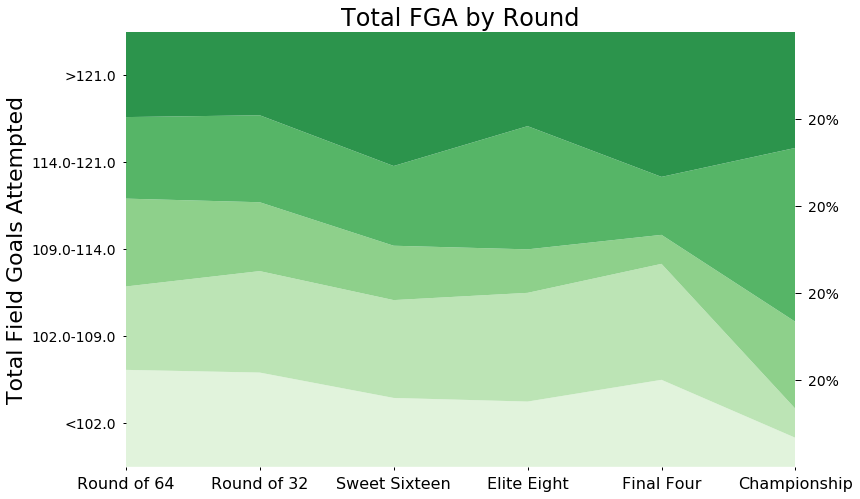

In [506]:
#### num_rounds=6

# Plot!
fig, ax = plt.subplots(1,1,figsize=(12,8))

# Decent Color Pallets: 'Paired', 'RdBu', 'Purples'
pal = sns.color_palette("Greens")

ax.stackplot(range(1, num_rounds+1), plot_dict[group_names[0]], plot_dict[group_names[1]],
             plot_dict[group_names[2]], plot_dict[group_names[3]], plot_dict[group_names[4]],
             colors = pal)#,
             #labels=[str(i) for i in range(1,17)])

ax.set_facecolor('white')

ax.set_xlim([1,num_rounds])
ax.set_ylim([0,1])
#ax.set_xlabel('Round', fontsize=18)
ax.set_ylabel('Total Field Goals Attempted', fontsize=22)
ax.set_title('Total FGA by Round', fontsize=24)
ax.set_yticks(np.linspace(1/(2*num_groups), 1-(1/(2*num_groups)), num_groups))
ax.set_yticklabels(group_names, fontsize=14)
ax.set_xticklabels(round_names[:num_rounds], fontsize=16)
ax.tick_params(axis=u'both', which=u'both',length=3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_yticks([.2, .4, .6, .8])
ax2.set_yticklabels(['20%', '20%', '20%', '20%'])
ax2.tick_params(axis=u'both', which=u'both',length=6, labelsize=14)
ax2.grid(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

#ax.legend()
plt.show()

# 3-Pointers Attempted

In [507]:
stat = 'TFGA3'
num_groups = 4
quantiles = np.linspace(1/num_groups,1-(1/num_groups),num_groups-1)
brackets = np.quantile(round_data_list[0][stat], quantiles)

# Dictionary of Lists of Seed Counts (Inde of List is the Seed-1)
score_counts = {'round1': [0]*num_groups, 'round2': [0]*num_groups, 'round3': [0]*num_groups, 'round4': [0]*num_groups, 'round5': [0]*num_groups, 'round6': [0]*num_groups}

for round_num, round_data in enumerate(round_data_list):
    round_num += 1
    score_list = list(round_data[stat])
    for score in score_list:
        
        # Figure Out Which Bucket Score Falls Into
        for i, b in enumerate(brackets):
            if score <= b:
                score_counts['round{}'.format(round_num)][i] += 1
                break
            elif score > brackets[-1]:
                score_counts['round{}'.format(round_num)][len(brackets)] += 1
                break
                
# Make Group Names
group_names = ['<{}'.format(brackets[0])] + ['{}-{}'.format(brackets[i], brackets[i+1]) for i in range(len(brackets)-1)] + ['>{}'.format(brackets[-1])]

# Convert to Percentages, Correct Formatting
plot_dict = transpose(to_percs(score_counts), num_rounds=6, group_names=group_names)

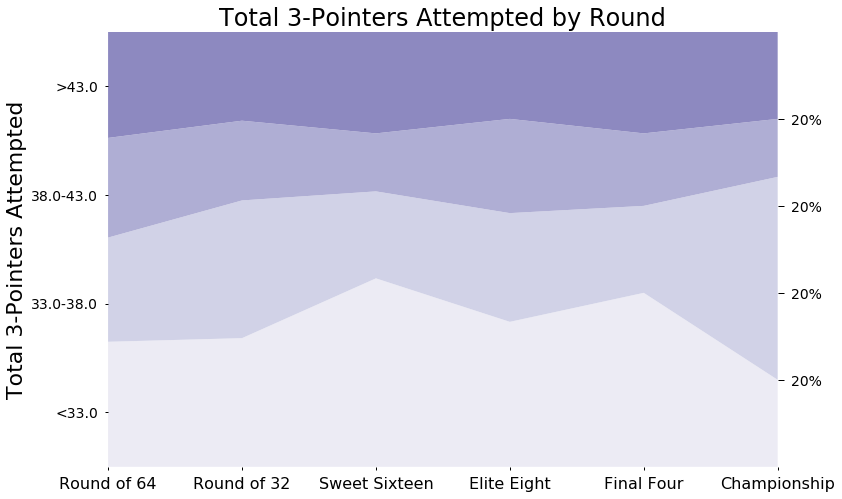

In [508]:
num_rounds=6

# Plot!
fig, ax = plt.subplots(1,1,figsize=(12,8))

# Decent Color Pallets: 'Paired', 'RdBu', 'Purples'
pal = sns.color_palette("Purples")

ax.stackplot(range(1, num_rounds+1), plot_dict[group_names[0]], plot_dict[group_names[1]],
             plot_dict[group_names[2]], plot_dict[group_names[3]],# plot_dict[group_names[4]],
             colors = pal)#,
             #labels=[str(i) for i in range(1,17)])

ax.set_facecolor('white')

ax.set_xlim([1,num_rounds])
ax.set_ylim([0,1])
#ax.set_xlabel('Round', fontsize=18)
ax.set_ylabel('Total 3-Pointers Attempted', fontsize=22)
ax.set_title('Total 3-Pointers Attempted by Round', fontsize=24)
ax.set_yticks(np.linspace(1/(2*num_groups), 1-(1/(2*num_groups)), num_groups))
ax.set_yticklabels(group_names, fontsize=14)
ax.set_xticklabels(round_names[:num_rounds], fontsize=16)
ax.tick_params(axis=u'both', which=u'both',length=3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_yticks([.2, .4, .6, .8])
ax2.set_yticklabels(['20%', '20%', '20%', '20%'])
ax2.tick_params(axis=u'both', which=u'both',length=6, labelsize=14)
ax2.grid(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

#ax.legend()
plt.show()

# Personal Fouls

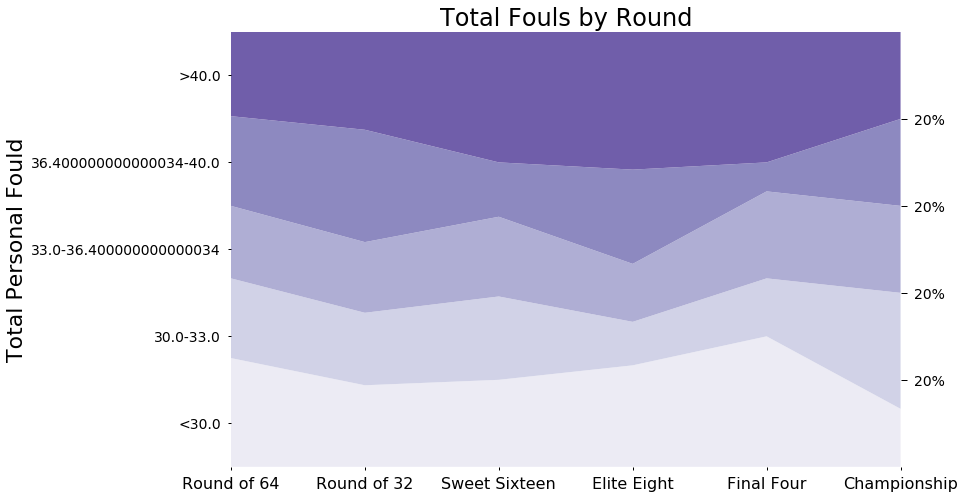

In [509]:
stat = 'TPF'
num_groups = 5
quantiles = np.linspace(1/num_groups,1-(1/num_groups),num_groups-1)
brackets = np.quantile(round_data_list[0][stat], quantiles)

# Dictionary of Lists of Seed Counts (Inde of List is the Seed-1)
score_counts = {'round1': [0]*num_groups, 'round2': [0]*num_groups, 'round3': [0]*num_groups, 'round4': [0]*num_groups, 'round5': [0]*num_groups, 'round6': [0]*num_groups}

for round_num, round_data in enumerate(round_data_list):
    round_num += 1
    score_list = list(round_data[stat])
    for score in score_list:
        
        # Figure Out Which Bucket Score Falls Into
        for i, b in enumerate(brackets):
            if score <= b:
                score_counts['round{}'.format(round_num)][i] += 1
                break
            elif score > brackets[-1]:
                score_counts['round{}'.format(round_num)][len(brackets)] += 1
                break
                
# Make Group Names
group_names = ['<{}'.format(brackets[0])] + ['{}-{}'.format(brackets[i], brackets[i+1]) for i in range(len(brackets)-1)] + ['>{}'.format(brackets[-1])]

# Convert to Percentages, Correct Formatting
plot_dict = transpose(to_percs(score_counts), num_rounds=6, group_names=group_names)

num_rounds=6

# Plot!
fig, ax = plt.subplots(1,1,figsize=(12,8))

# Decent Color Pallets: 'Paired', 'RdBu', 'Purples'
pal = sns.color_palette("Purples")

ax.stackplot(range(1, num_rounds+1), plot_dict[group_names[0]], plot_dict[group_names[1]],
             plot_dict[group_names[2]], plot_dict[group_names[3]], plot_dict[group_names[4]],
             colors = pal)#,
             #labels=[str(i) for i in range(1,17)])

ax.set_facecolor('white')

ax.set_xlim([1,num_rounds])
ax.set_ylim([0,1])
#ax.set_xlabel('Round', fontsize=18)
ax.set_ylabel('Total Personal Fould', fontsize=22)
ax.set_title('Total Fouls by Round', fontsize=24)
ax.set_yticks(np.linspace(1/(2*num_groups), 1-(1/(2*num_groups)), num_groups))
ax.set_yticklabels(group_names, fontsize=14)
ax.set_xticklabels(round_names[:num_rounds], fontsize=16)
ax.tick_params(axis=u'both', which=u'both',length=3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_yticks([.2, .4, .6, .8])
ax2.set_yticklabels(['20%', '20%', '20%', '20%'])
ax2.tick_params(axis=u'both', which=u'both',length=6, labelsize=14)
ax2.grid(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

#ax.legend()
plt.show()